# Exercise 02

### Plot txt data

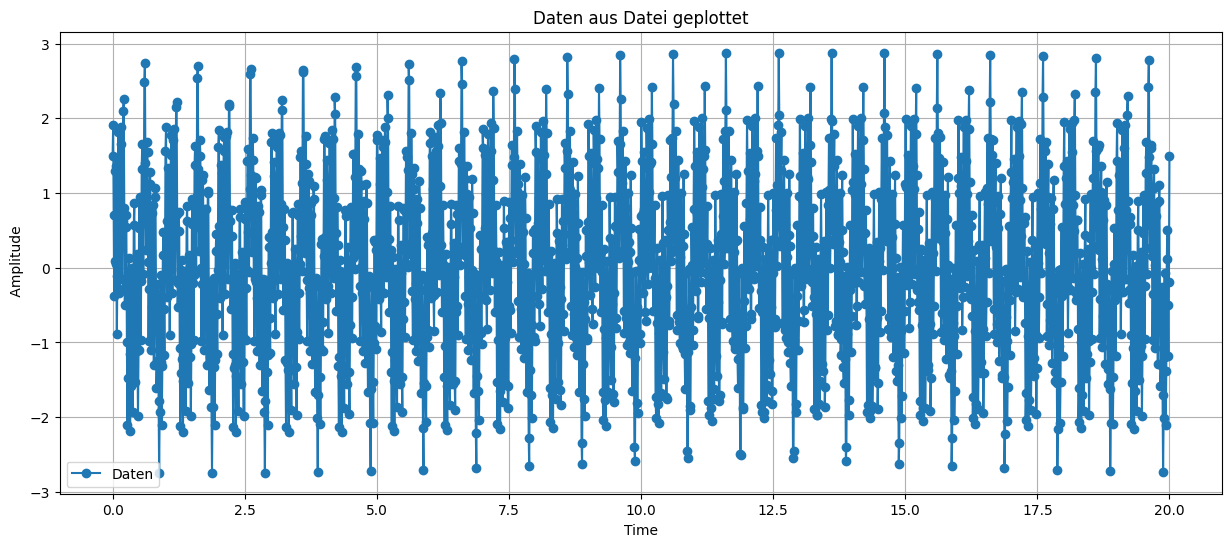

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_data_from_txt(file_path):
    # Daten einlesen
    df = pd.read_csv(file_path, skiprows=1, delimiter=',', header=None)
    
    # X- und Y-Daten extrahieren
    x_data = df.iloc[:, 0].values
    y_data = df.iloc[:, 1].values
    
    # Achsenbeschriftungen aus der ersten Zeile extrahieren
    with open(file_path, 'r') as file:
        labels = file.readline().strip().split(',')
    
    # Plot erstellen
    plt.figure(figsize=(15, 6))
    plt.plot(x_data, y_data, marker='o', linestyle='-', label='Daten')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.title('Daten aus Datei geplottet')
    plt.legend()
    plt.grid()
    plt.show()


# Beispielaufruf
plot_data_from_txt('simple_signal.txt')

### Fouriertransofmation 

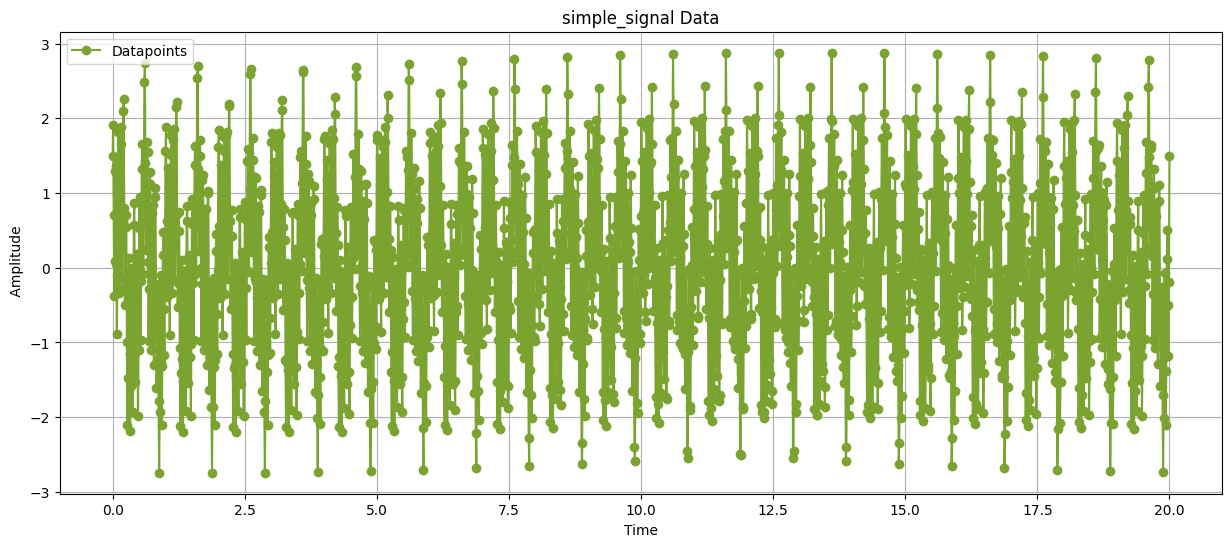

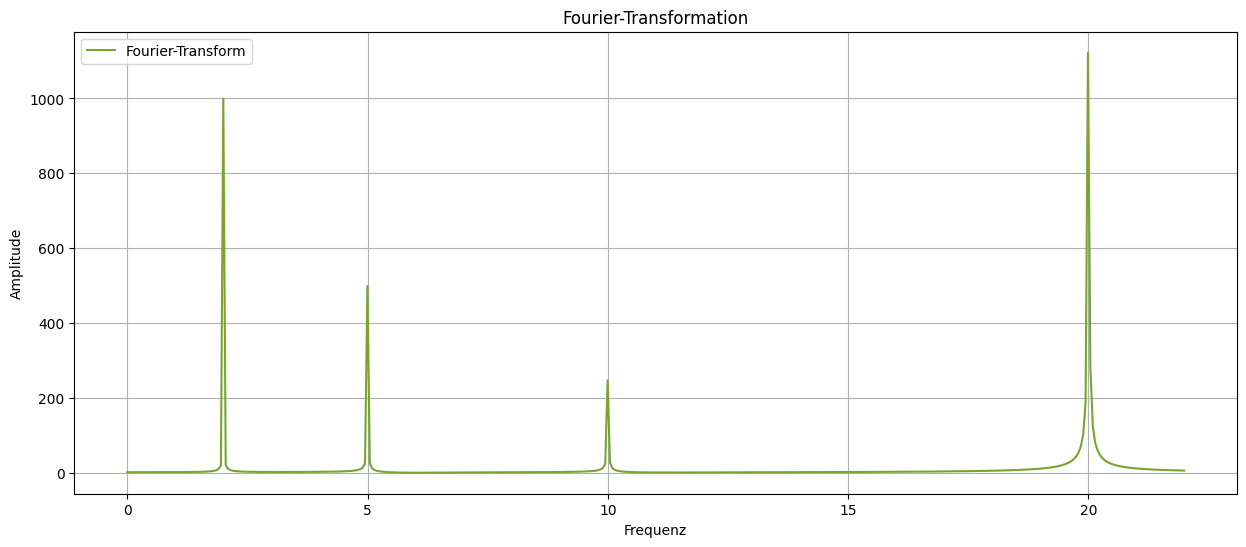

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



def plot_data_from_txt(file_path, x_minff=None, x_maxff=None):
    # Daten einlesen
    df = pd.read_csv(file_path, skiprows=1, delimiter=',', header=None)
    
    # X- und Y-Daten extrahieren
    x_data = df.iloc[:, 0].values
    y_data = df.iloc[:, 1].values
    
    # Achsenbeschriftungen aus der ersten Zeile extrahieren
    with open(file_path, 'r') as file:
        labels = file.readline().strip().split(',')
    
    # Originaldaten plotten
    plt.figure(figsize=(15, 6))
    plt.plot(x_data, y_data, marker='o', linestyle='-', label='Datapoints', color='#7aa42f')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.title('simple_signal Data')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Fourier-Transformation berechnen
    fft_values = np.fft.fft(y_data)
    freq = np.fft.fftfreq(len(y_data), d=(x_data[1] - x_data[0]))
    
    # Frequenzbereich begrenzen
    mask = (freq >= x_minff) & (freq <= x_maxff) if x_minff is not None and x_maxff is not None else (freq > 0)

    # Fourier-Transformationsplot
    plt.figure(figsize=(15, 6))
    plt.plot(freq[mask], np.abs(fft_values[mask]), label='Fourier-Transform', color='#7aa42f')
    plt.xlabel('Frequenz')
    plt.ylabel('Amplitude')
    plt.title('Fourier-Transformation')
    plt.legend()
    plt.grid()
    plt.show()

# Beispielaufruf mit einem definierten x-Bereich
plot_data_from_txt('simple_signal.txt', x_minff=0, x_maxff=22)


### Spectral density of frequency noise - wrong formula - just square amplitude or so... 

c:\Users\samse\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\samse\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\samse\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:1308: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\samse\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:1308: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\samse\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:1309: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\samse\

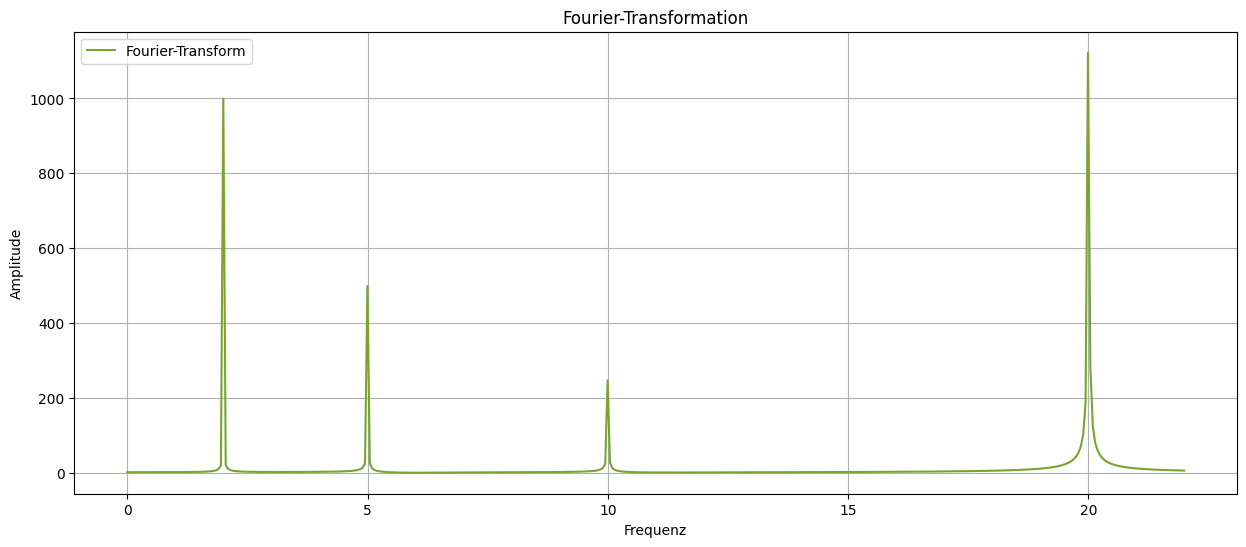

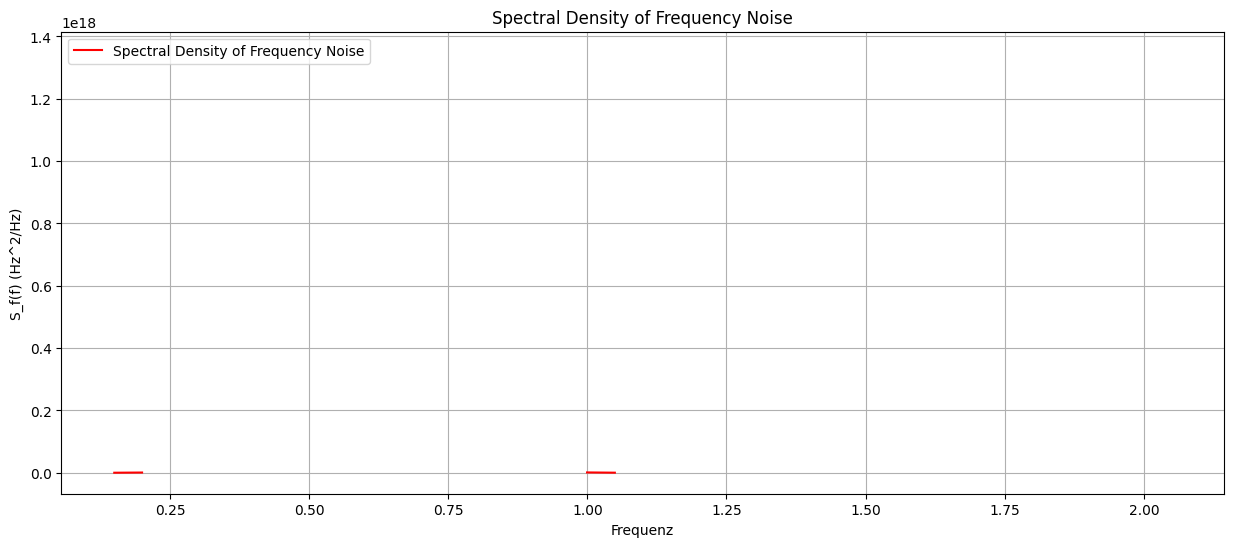

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

def compute_spectral_density(frequency, spectrum):
    """
    Computes the spectral density of frequency noise from a laser spectrum using Elliott's formula.
    
        S_f(f) = (pi / 2) * (d/d f) [spectrum(f)] / spectrum(f)
    
    Parameters:
        frequency (numpy array): Frequency values in Hz
        spectrum (numpy array): Power spectral density (arbitrary units)
    
    Returns:
        freq_noise_spectral_density (numpy array): Spectral density of frequency noise (Hz^2/Hz)
    """
    # Ensure frequencies are sorted
    sorted_indices = np.argsort(frequency)
    frequency = frequency[sorted_indices]
    spectrum = spectrum[sorted_indices]
    
    # Avoid division by zero by replacing zeros with a small value
    eps = 1e-12  # Small constant to prevent division by zero
    spectrum = np.where(spectrum == 0, eps, spectrum)
    
    # Interpolation to avoid numerical issues
    interp_spectrum = interp1d(frequency, spectrum, kind='cubic', fill_value='extrapolate')
    df = np.gradient(frequency)
    dS_df = np.gradient(interp_spectrum(frequency), df)
    
    # Apply Elliott's formula
    spectral_density = (np.pi / 2) * dS_df / spectrum
    
    return spectral_density

def plot_data_from_txt(file_path, x_minff=None, x_maxff=None):
    # Daten einlesen
    df = pd.read_csv(file_path, skiprows=1, delimiter=',', header=None)
    
    # X- und Y-Daten extrahieren
    x_data = df.iloc[:, 0].values
    y_data = df.iloc[:, 1].values
    
    # Achsenbeschriftungen aus der ersten Zeile extrahieren
    with open(file_path, 'r') as file:
        labels = file.readline().strip().split(',')
    
    # Fourier-Transformation berechnen
    fft_values = np.fft.fft(y_data)
    freq = np.fft.fftfreq(len(y_data), d=(x_data[1] - x_data[0]))
    
    # Frequenzbereich begrenzen
    mask = (freq >= x_minff) & (freq <= x_maxff) if x_minff is not None and x_maxff is not None else (freq > 0)
    
    # Berechnung der spektralen Dichte der Frequenzrauschens
    spectral_density = compute_spectral_density(freq[mask], np.abs(fft_values[mask]))
    
    # Fourier-Transformationsplot
    plt.figure(figsize=(15, 6))
    plt.plot(freq[mask], np.abs(fft_values[mask]), label='Fourier-Transform', color='#7aa42f')
    plt.xlabel('Frequenz')
    plt.ylabel('Amplitude')
    plt.title('Fourier-Transformation')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Plot der spektralen Dichte des Frequenzrauschens
    plt.figure(figsize=(15, 6))
    plt.plot(freq[mask], spectral_density, label='Spectral Density of Frequency Noise', color='red')
    plt.xlabel('Frequenz')
    plt.ylabel('S_f(f) (Hz^2/Hz)')
    plt.title('Spectral Density of Frequency Noise')
    plt.legend()
    plt.grid()
    plt.show()

# Beispielaufruf mit einem definierten x-Bereich
plot_data_from_txt('simple_signal.txt', x_minff=0, x_maxff=22)
